# ✳ Numerical Differentiation
## ✅ 미분과 수치 미분
### ▶ 미분
####    
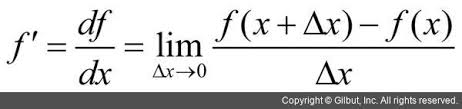
####    
- 미분은 시간을 가능한 한 줄여 한순간의 변화량을 표시한 것
- 이 때 시간 $h$를 한없이 0에 가깝게 한다

In [12]:
## bad example
def bad_numerical_diff(f, x):
    h = 10e-50 # 아주아주 작은 값
    return f(x + h) - f(x) / h

#### 첫 번째 개선점
- 이 경우 1e-50을 32bit 부동소수점(float32형)으로 나타내면 0.0이 되어, 올바로 표현할 수 없음
- 너무 작은 값을 이용하면 컴퓨터로 계산하는 데 문제

#### 두 번째 개선점
- 함수 f의 차분에 관한 것
    - *차분이란? 임의 두 점에서 함수 값들의 차이
- 본래 구현에서는 x + h와 x사이의 함수 f의 차분을 계산하고 있지만, 이 계산에는 오차가 있음.
- '진정한 미분'은 x위치의 함수의 기울기에 해당하지만, 이번 구현의 미분은 (x + h)와 x 사이의 기울기에 해당하므로 엄밀하게 동일하지는 않음
- 이 차이는 h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계
🔽 진정한 미분과 수치미분의 결과값 차이

####    
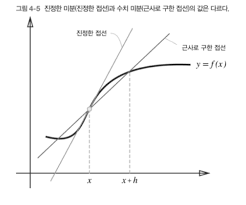
####    

- 이 오차를 줄이기 위해 (x + h)와 (x - h)일 떄의 함수 f의 차분을 계산하는 방법 : **중심 차분 or 중앙 차분**
- (x + h)와 x의 차분 : **전방 차분**

In [42]:
## improved example
def numerical_diff(f, x):
    print("improved numerical_diff")
    h = 1e-4 # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

### ▶ 수치미분의 예
$y = 0.01x^2 + 0.1x$

In [14]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

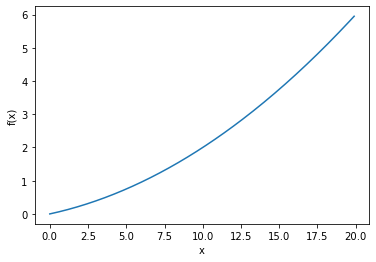

In [15]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0 ~ 20까지의 간격 0.1인 배열x
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [20]:
# x가 5일 떄와 10일 때 이 함수의 미분
print('x = 5일 때 미분', numerical_diff(function_1, 5))
print('x = 10일 때 미분', numerical_diff(function_1, 10))

improved numerical_diff
x = 5일 때 미분 0.1999999999990898
improved numerical_diff
x = 10일 때 미분 0.2999999999986347


## ✅ 편미분 (Partial Derivative)
$f(x_0, x_1) = x^{2}_{0} + x^{2}_{1}$
- 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구함
- 단, 여러 변수 중 **목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정**

In [44]:
def function_2(x):
    return x[0]**2 + x[1]**2

# x_0에 대한 편미분
def function_2_tmp1(x):
    return x*x + 4.0**2.0

# x_1에 대한 편미분
def function_2_tmp2(x):
    return 3.0**2.0 + x*x

In [45]:
print(numerical_diff(function_2_tmp1, 3.0))
print(numerical_diff(function_2_tmp2, 4.0))

improved numerical_diff
6.00000000000378
improved numerical_diff
7.999999999999119


## ✅ 기울기
- 앞에서는 $x_1$과 $x_2$의 편미분을 변수별로 따로 계산하였는데,
- 이를 **동시에** 계산하고 싶다면?
    - 모든 변수의 편미분을 벡터로 정리한 것 : **기울기(gredient)**

In [49]:
# get gradient function
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x + h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x - h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

####    
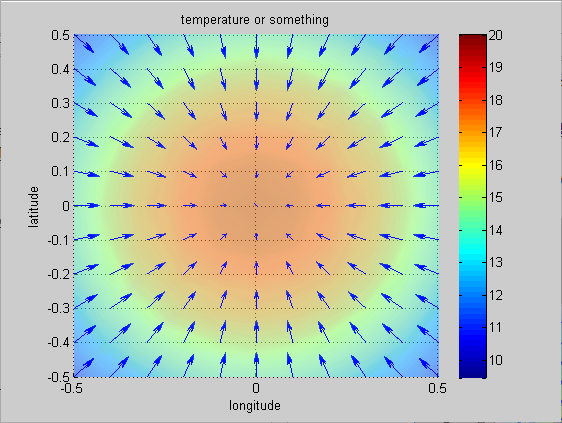
####   
- 위 그림에서처럼 기울기는 각 지점에서 낮아지는 방향을 가리킴
### (중요) **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 줄이는 방향**

## ✅ 경사하강법 (Gredient Descent Method)
- 각 지점에서 함수의 값을 낮추는 방향을 제시하는 지표가 기울기
- 하지만 100% 보장할 수는 없음
- 기울어진 방향이 무조건 최소값을 가리키는 것은 아니지만, 그 방향으로 가야 함수의 값을 줄일 수 있다.
- 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하기를 반복
    - 이 방식으로 함수의 값을 점차 줄이는 것이 경사법
####    
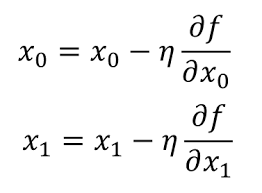
####    

In [50]:
# Gredient Descent
def gradient_descent(f, init_x, lr=0.01, step_num=100): # f : 최적화 하려는 func / init_x : 초깃값 / lr(learning rate) : 학습률 / step_num : 반복 횟수
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

- 여기서 학습률(learning rate) 는  0.01이나 0.001 등 미리 특정 값으로 정해두어야 하는데,
- 신경망 학습에서 학습률을 적절히 변경하면서 올바르게 학습하고 있는 지 확인하며 진행한다

In [51]:
init_x = np.array([-3.0, 4.0])
print("result : ", gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100))

result :  [-6.11110793e-10  8.14814391e-10]


####   
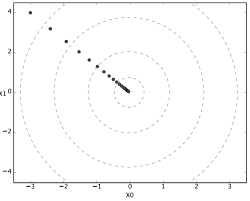
####   

In [54]:
# 학습률이 너무 큰 예
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100))

# 학습률이 너무 작은 예
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100))


[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


## NOTE
- 학습률 같은 매개변수는 **hyper parameter -> 사람이 직접 설정**
- 가중치와 편향 같은 신경망의 매개변수 -> data 와 algorithm에 의해 자동으로 획득

### ▶ 신경망에서의 기울기
####   
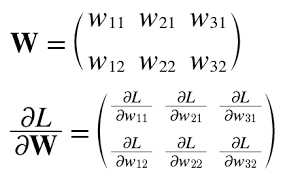
####   


In [77]:
# 실제 기울기 구하기
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
    
    # 예측 수행 함수
    def predict(self, x):
        return np.dot(x, self.W)
    
    # 손실함수의 값 구하는 함수
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [102]:
# main
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p) # 최댓값 index

t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)

[[-2.05285131  0.8881997   0.82120879]
 [ 0.69678673  0.45633899 -0.7004122 ]]
[-0.60460273  0.94362491 -0.1376457 ]


1.5206784806778708

In [106]:
# main - 기울기 구하기
'''
def f(W):
    return net.loss(x, t)
'''
# lambda version
f = lambda w: net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.08221985  0.38664402 -0.46886387]
 [ 0.12332978  0.57996603 -0.70329581]]
